<a href="https://colab.research.google.com/github/Boppitystar/diffusion-model-project/blob/main/diffusionModelNotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diffusion model from Hugging face (Pipeline, Model, Scheduler)**

Forward process: a fixed, predefined process where noise following a gaussian distribution (normal distribution) is added in intervals of time t, from t =0, where an image is sampled from you dataset (ex. Smiling cat)  to T = 1000 where there should be so much random noise that it represents an isotropic gaussian distribution. This time interval where gaussian noise is added to the image is controlled by a variance scheduler.  

*   Neural Network Training Grounds  

Reverse process:  

Model: the neural network that processes an input image of pure Gaussian noise and produces a less noisy image (predicts the noise residual between a slightly less noisy image and the input image). This process is run through multiple times through UNet architecture where the image is run through layers where the image size is halved every time and then rebuilt back up so that the output image is the same size.
*italicized text*


*   UNet Architecture: Output is the same size (spatial resolution) as input
*   Down sampling (encoders): gradually decreases resolution and separates or extracts the distinguishing features of the image (seen through the increasing number of block channels out as image is passed through the different DownBlock 2D layers (contains 2 ResNet layers)  

*   Up sampling (decoders): resolution and distinguishing features of the image are added up again as the image size doubles  

*   Key connecting paths between each layer/step of the encoding and decoding paths, where saved features/details can be directly transferred to up sampling block at the same level   

Improve the weightings and parameters of the neural network by comparing the rendered image to actual, grounded image, finding the differences between the pixels (similar to L1 Loss) and backproprogate the image through to improve the model  

Neural Network: made up of an input layer where images, made of a grid of pixels are, separated into neurons and then connected to different neurons in hidden layers and finally an output layer where the output image contains the same number of neurons/pixels

Gaussian Noise: random noise that follows a normal distribution curve where y is the probability of the amount of noise occurring (common in many systems such as the heat generated from electron movement through a wire and receiver as a signal is passed through)  

Scheduler: contains and defines the math logic and parameters and the variance scheduler  

Pipeline: contains a scheduler and a model, allowing a user to use the diffusion model and go through the full process of generating an image within its functions

# Diffusion Pipeline Inference


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/180 [00:00<?, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/790 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/455M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--google--ddpm-celebahq-256/snapshots/cd5c944777ea2668051904ead6cc120739b86c4d: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--google--ddpm-celebahq-256/snapshots/cd5c944777ea2668051904ead6cc120739b86c4d.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/1000 [00:00<?, ?it/s]

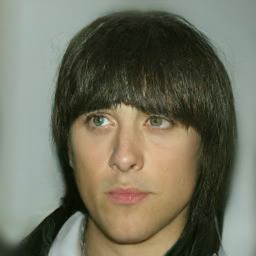

In [ ]:
!pip install diffusers

from diffusers import DDPMPipeline

image_pipe = DDPMPipeline.from_pretrained("google/ddpm-celebahq-256") #downloads a trained pipeline from the google celebrity dataset

image_pipe.to("cuda") # this moves the loaded pipe to a GPU

images = image_pipe().images

images[0]

Generates this image, changes every time from the celeb dataset

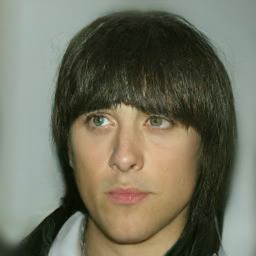

The pipeline contains all the model and scheduler used to first generate a image that is only random noise and then predicts the difference/residual between a less noisy image and the current image, which it is trained to be able to do through neural network learning. Will go into more detail on the models and schedulers seperately for the code.